In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,classification_report,roc_curve, auc, f1_score
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 4-Class 

In [4]:
list_dir =glob.glob("/Users/Gaia_1/Desktop/tesi/Data after PP scores/*.txt")
dfs = []

for file in list_dir:
    df = pd.read_csv(file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.to_csv("merged_data.csv", index=False)
dataset_after=merged_df

dataset_after = dataset_after.drop(['Unnamed: 0'],axis=1)
dataset_after = dataset_after.drop(['score'],axis=1)
dataset_after

,mu1,lam1,mu2,sigma2,mu3,sigma3,w1,w2,w3,Target,Stimulation
0,0.033752,0.026832,6.146017e-02,0.030909,0.383788,0.344440,1.000000,1.460269e-07,3.546668e-08,0.0,0.0
1,0.033134,0.026059,6.314898e-02,0.036732,0.386172,0.350197,1.000000,1.033784e-08,5.968611e-09,0.0,0.0
2,0.033298,0.026767,6.708787e-02,0.046021,0.386777,0.349459,1.000000,1.959580e-07,9.157318e-08,0.0,0.0
3,0.033493,0.026519,6.282182e-02,0.030459,0.383312,0.341055,1.000000,9.648819e-08,3.575563e-08,0.0,0.0
4,0.032974,0.025866,6.308468e-02,0.033693,0.385092,0.347405,1.000000,4.407161e-08,1.683473e-08,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
806,0.050616,0.026634,2.284669e-02,0.096958,0.315152,0.163408,0.543656,4.563435e-01,5.968653e-08,0.0,0.0
807,0.057557,0.028160,5.235134e-02,0.069468,0.321707,0.192334,0.575948,4.240515e-01,1.911695e-07,0.0,0.0
808,0.053260,0.031083,5.737179e-07,0.108185,0.248023,0.060402,0.445422,5.545780e-01,9.840582e-16,0.0,0.0
809,0.048749,0.026283,3.671914e-07,0.111340,0.312674,0.154662,0.451368,5.486318e-01,3.613233e-09,0.0,0.0


In [111]:
dataset = pd.read_csv('PPmodeled_data.csv')

In [112]:
print('Target LRRK2 vs Healthy\n',dataset['Target'].value_counts())
print('Stimulated LRRK2 vs Healthy\n',dataset['Stimulation'].value_counts())

Target LRRK2 vs Healthy
 1.0    543
0.0    464
Name: Target, dtype: int64
Stimulated LRRK2 vs Healthy
 0.0    609
1.0    398
Name: Stimulation, dtype: int64


In [113]:
dataset = dataset.drop(['Unnamed: 0'],axis=1)
dataset = dataset.drop(['score'],axis=1)

In [114]:
dataset['class'] = np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 0), 0,
                   np.where((dataset['Target'] == 0) & (dataset['Stimulation'] == 1), 1,
                   np.where((dataset['Target'] == 1) & (dataset['Stimulation'] == 0), 2, 3)))


X = dataset.drop(["Stimulation", "Target", "class"], axis=1)
y = dataset["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


In [117]:
dataset['class'].value_counts()

2    377
0    232
1    232
3    166
Name: class, dtype: int64

In [118]:
dataset['class'].value_counts(1)

2    0.374379
0    0.230387
1    0.230387
3    0.164846
Name: class, dtype: float64

# Classification Tree

In [119]:
print("Classification report on Test set\n")
gs_ct4 = DecisionTreeClassifier(max_depth=7,random_state=23)
gs_ct4.fit(X_train,y_train)
y_true, y_pred = y_test, gs_ct4.predict(X_test)
y_prob = gs_ct4.predict_proba(X_test)

Classification report on Test set



In [120]:
accuracy_ct = accuracy_score(y_true, y_pred)
precision_ct = precision_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
recall_ct = recall_score(y_true, y_pred, average='macro')
f1_ct = f1_score(y_true, y_pred, average='macro')  
roc_auc_ct=plot_roc_curve_multiclass(y_true, y_prob, 0)
print("Accuracy:", accuracy_ct)
print("Precision:", precision_ct)
print("Recall:", recall_ct)
print("F1-Score:", f1_ct)
print("Micro-average ROC AUC: ",roc_auc_ct)

Accuracy: 0.7623762376237624
Precision: 0.7057411468781507
Recall: 0.7049961801467826
F1-Score: 0.6987081991542825
Micro-average ROC AUC:  0.8905581152174623


In [121]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82        56
           1       0.72      0.92      0.81        37
           2       0.79      0.84      0.81        83
           3       0.40      0.31      0.35        26

    accuracy                           0.76       202
   macro avg       0.71      0.70      0.70       202
weighted avg       0.76      0.76      0.76       202



Text(29.749999999999993, 0.5, 'True')

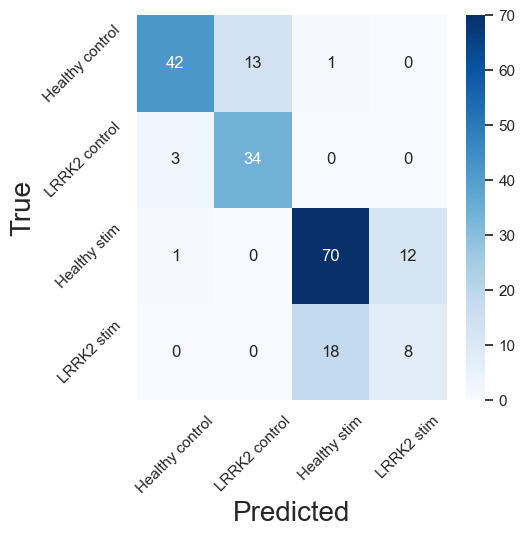

In [122]:
cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,5))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

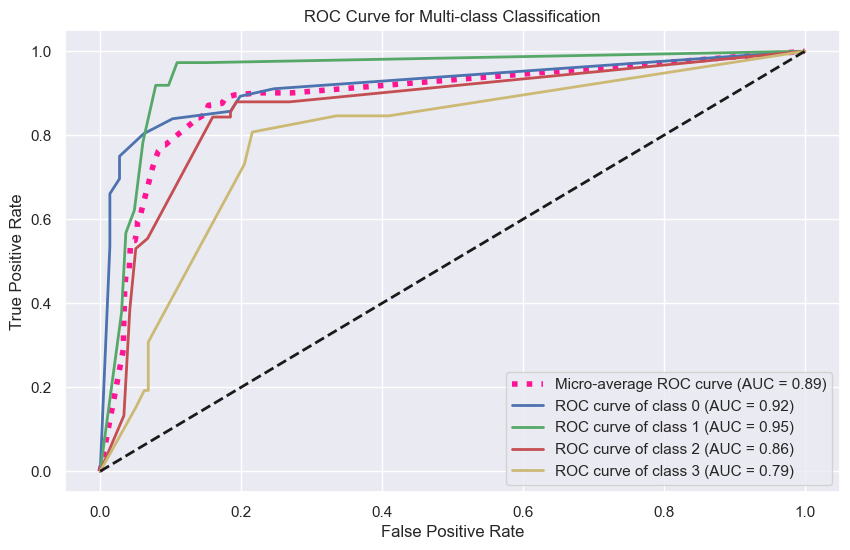

ROC AUC scores:
Class 0: 0.9180528375733854
Class 1: 0.9462735462735463
Class 2: 0.8640781613850359
Class 3: 0.793159965034965
Micro-average ROC AUC: 0.8905581152174623


0.8905581152174623

In [123]:
#y_pred_proba = gs_ct4.predict_proba(X_test)
plot_roc_curve_multiclass(y_true, y_prob, 1)

# Logistic Regression

In [124]:
print("Classification report on Test set\n")
gs_lr4 = LogisticRegression(penalty='l2',C=0.5)
gs_lr4.fit(X_train,y_train)
y_true, y_pred = y_test, gs_lr4.predict(X_test)
y_prob = gs_lr4.predict_proba(X_test)


Classification report on Test set



In [125]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.57      0.64        56
           1       0.61      0.76      0.67        37
           2       0.72      0.96      0.82        83
           3       1.00      0.04      0.07        26

    accuracy                           0.70       202
   macro avg       0.76      0.58      0.55       202
weighted avg       0.74      0.70      0.65       202



Text(29.749999999999993, 0.5, 'True')

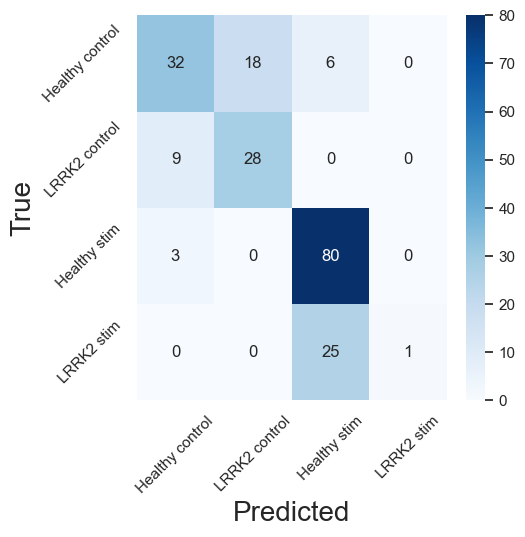

In [126]:
cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,5))
sns.set(font_scale=1.) 
chart = sns.heatmap(df_cm,annot=True,cmap="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

In [127]:
accuracy_lr = accuracy_score(y_true, y_pred)
precision_lr = precision_score(y_true, y_pred, average='macro')  # Can also use 'micro' or 'weighted'
recall_lr = recall_score(y_true, y_pred, average='macro')  
f1_lr = f1_score(y_true, y_pred, average='macro')  
roc_auc_lr=plot_roc_curve_multiclass(y_true, y_prob, 0)
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)
print("Micro ROC AUC:",roc_auc_lr)

Accuracy: 0.698019801980198
Precision: 0.7641722750418403
Recall: 0.5826255720834034
F1-Score: 0.5533787843240084
Micro ROC AUC: 0.9103846028167174


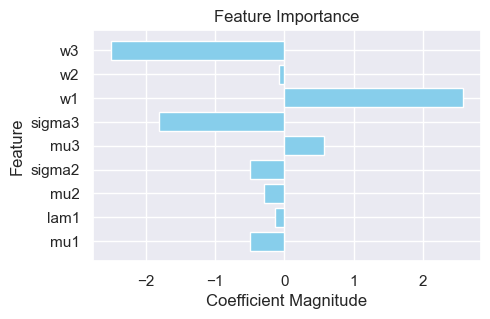

In [128]:
coefficients = gs_lr4.coef_[0]

feature_names = X.columns

plt.figure(figsize=(5, 3))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

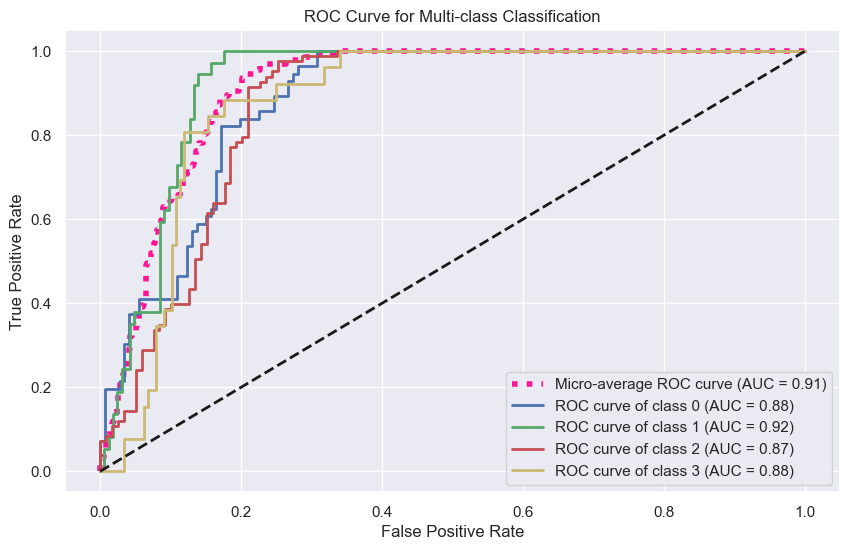

ROC AUC scores:
Class 0: 0.8835616438356164
Class 1: 0.9208845208845209
Class 2: 0.8710134656272147
Class 3: 0.8802447552447552
Micro-average ROC AUC: 0.9103846028167174


0.9103846028167174

In [129]:
plot_roc_curve_multiclass(y_true, y_prob, 1)

# Random Forest 1

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier()

param_grid = {
    'max_samples': [0.7],
    'max_features': [0.4],
    'criterion': ['entropy'],
    'n_estimators': [100], 
    'max_depth': [10], 
    'min_samples_split': [2, 3], 
    'min_samples_leaf': [1] 
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END criterion=entropy, max_depth=10, max_features=0.4, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=0.4, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=0.4, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=0.4, max_samples=0.7, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=0.4, max_samples=0.7, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=0.4, max_samples=0.7, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
Best Parame

In [131]:
accuracy_rf = accuracy_score(y_true, y_pred)
precision_rf = precision_score(y_true, y_pred, average='macro')  
recall_rf = recall_score(y_true, y_pred, average='macro')  
f1_rf = f1_score(y_true, y_pred, average='macro')  
roc_auc_rf=plot_roc_curve_multiclass(y_true, y_prob, 0)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("Micro ROC AUC:", roc_auc_rf)

Accuracy: 0.7623762376237624
Precision: 0.6937232905982906
Recall: 0.6837339333574274
F1-Score: 0.6737767717467922
Micro ROC AUC: 0.9510750580008497


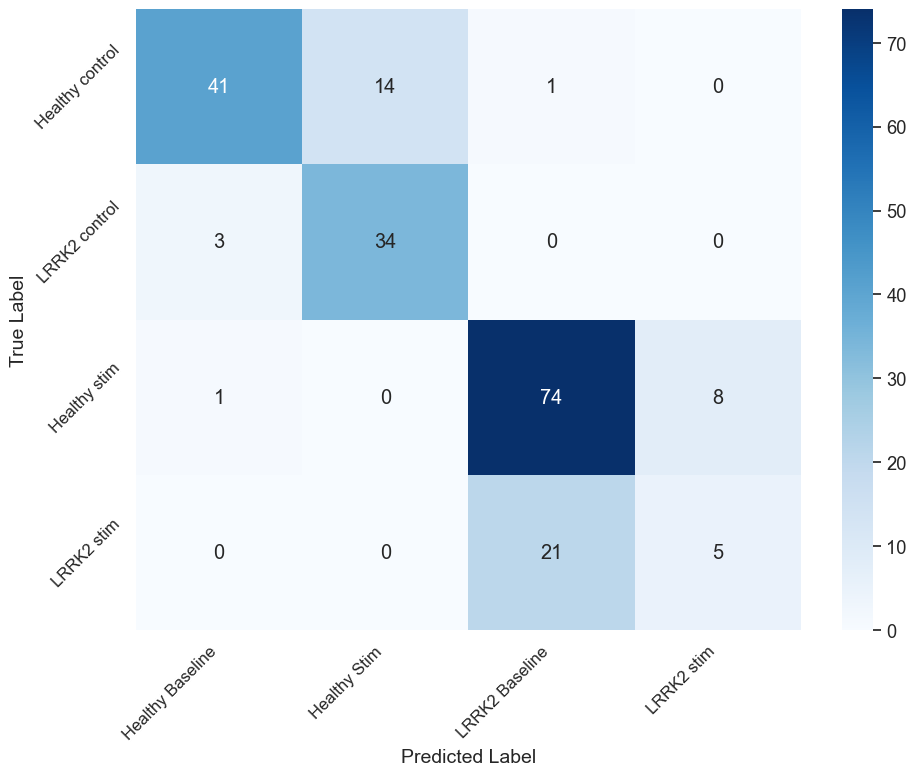

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])
df_cm = pd.DataFrame(cm, columns=['Healthy Baseline', 'Healthy Stim', 'LRRK2 Baseline', 'LRRK2 stim'], 
                     index=['Healthy control', 'LRRK2 control', 'Healthy stim', 'LRRK2 stim'])

# Plot confusion matrix
plt.figure(figsize=(5, 4))  
sns.set(font_scale=1.2) 
chart = sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right', fontsize=12)  
chart.set_yticklabels(chart.get_yticklabels(), rotation=45, fontsize=12)  
plt.xlabel('Predicted Label', fontdict={'size': 14}) 
plt.ylabel('True Label', fontdict={'size': 14})  
plt.tight_layout() 
#plt.savefig('conf_mat_RF4.jpg')
plt.show()


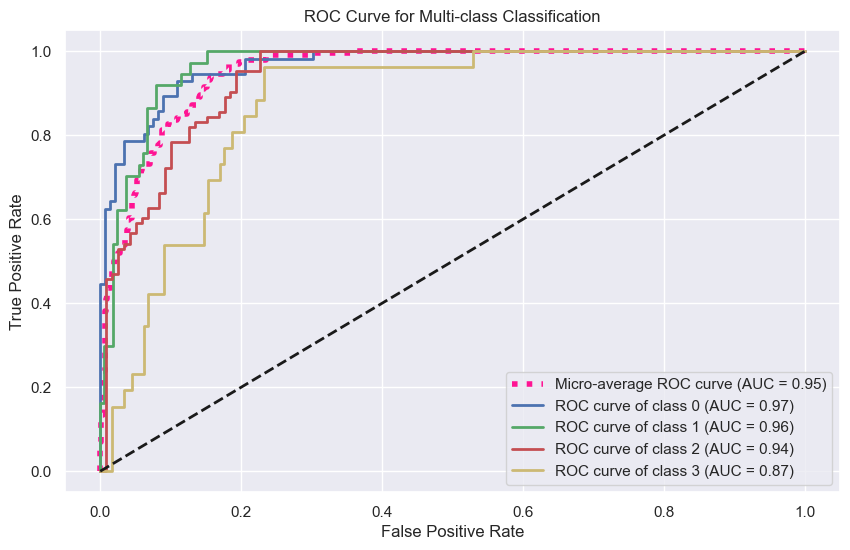

ROC AUC scores:
Class 0: 0.9675880626223092
Class 1: 0.9646191646191646
Class 2: 0.9359117140832236
Class 3: 0.8730332167832168
Micro-average ROC AUC: 0.9510750580008497


0.9510750580008497

In [133]:
plot_roc_curve_multiclass(y_true, y_prob, 1)

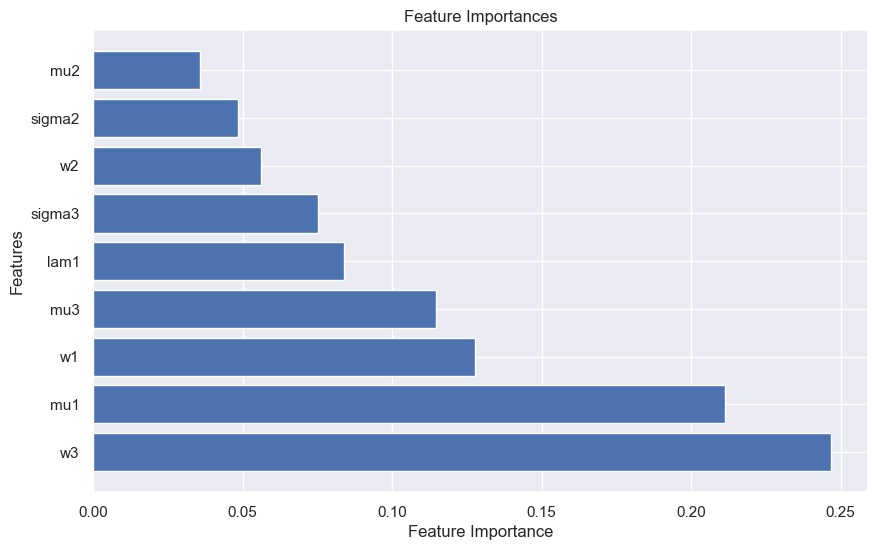

In [135]:
feature_importances = best_rf_model.feature_importances_

feature_names = X.columns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(5, 4))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
#plt.savefig('feature_importance_RF4.jpg')
plt.show()

# Random Forest

In [32]:
from hyperopt.pyll import scope
from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import cross_val_score


In [33]:
from hyperopt import hp
space = {}

#RF
space['n_estimators'] = hp.choice('n_estimators', np.arange(50, 300,1, dtype=int))
space['max_samples'] = hp.uniform('max_samples',0.4,1)
space['max_features'] = hp.uniform('max_features',0.4,1)
space['criterion'] = hp.choice('criterion',['gini','entropy'])
space['max_depth'] = scope.int(hp.quniform('max_depth',3,10,1))
space['ccp_alpha']=hp.uniform('ccp_alpha',0,0.001)
space['bootstrap'] = hp.choice('bootstrap', [True])
space['min_samples_leaf']=scope.int(hp.quniform('min_samples_leaf',1,5,1))
space['min_samples_split']=scope.int(hp.quniform('min_samples_split',2,10,1))

In [35]:
from sklearn.ensemble import RandomForestClassifier

def objective(params):
        ######################## hyper params ##############################

        params_RF = {}
        
        params_RF['n_estimators'] = params['n_estimators']
        params_RF['max_samples'] = params['max_samples']
        params_RF['max_features'] = params['max_features']
        params_RF['criterion'] = params['criterion']
        params_RF['max_depth'] = params['max_depth']
        params_RF['ccp_alpha'] = params['ccp_alpha']
        params_RF['bootstrap'] = params['bootstrap']
        params_RF['min_samples_leaf'] = params['min_samples_leaf']
        params_RF['min_samples_split'] = params['min_samples_split']
        

        ########################## Classifier definition ###################

        classifier = RandomForestClassifier(n_jobs=-1)
        classifier.set_params(**params_RF)

        
        ######################### Model testing ################################

        shuffle = StratifiedKFold(n_splits=4, shuffle=True, random_state=12)
        
        

        score = cross_val_score(classifier, X_train, y_train, cv=shuffle, scoring='accuracy', n_jobs=-1)
        score = np.mean(score)
        
        

        return 1 - score

    ######################## Start optim ####################################



# The Trials object will store details of each iteration
trials = Trials()

    # Run the hyperparameter search using the tpe algorithm
best = fmin(objective,
                space,
                algo=tpe.suggest,
                max_evals=100,
                trials=trials)

100%|███████| 100/100 [02:02<00:00,  1.23s/trial, best loss: 0.2782559972415152]


In [39]:
cat = {}
cat['n_estimators'] = np.arange(50, 150, dtype=int)
cat['bootstrap'] = [False,True]
cat['criterion'] = ['gini','entropy']
best_models = performance_visualizer(trials, 300, choice=True, **cat)

In [40]:
best_dict = best_models.to_dict(orient='records')[-1]

In [41]:
best_dict.pop('performance')

0.7217440027584848

In [42]:
best_dict['min_samples_leaf']=int(best_dict['min_samples_leaf'])
best_dict['min_samples_split']=int(best_dict['min_samples_split'])
best_dict['max_depth']=int(best_dict['max_depth'])
best_dict['bootstrap']=True

In [45]:
print("Classification report on Test set\n")
gs_rf4 = RandomForestClassifier()
gs_rf4.set_params(**best_dict)
gs_rf4.fit(X_train,y_train)
y_true, y_pred = y_test, gs_rf4.predict(X_test)
y_prob = gs_rf4.predict_proba(X_test)


Classification report on Test set



In [46]:
accuracy_rf = accuracy_score(y_true, y_pred)
precision_rf = precision_score(y_true, y_pred, average='macro') 
recall_rf = recall_score(y_true, y_pred, average='macro') 
f1_rf = f1_score(y_true, y_pred, average='macro') 
roc_auc_rf=plot_roc_curve_multiclass(y_true, y_prob, 0)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("Micro ROC AUC:", roc_auc_rf)

Accuracy: 0.7673267326732673
Precision: 0.6832798089591569
Recall: 0.6787362547904717
F1-Score: 0.6606658047834518
Micro ROC AUC: 0.952823252622292


Text(29.749999999999993, 0.5, 'True Label')

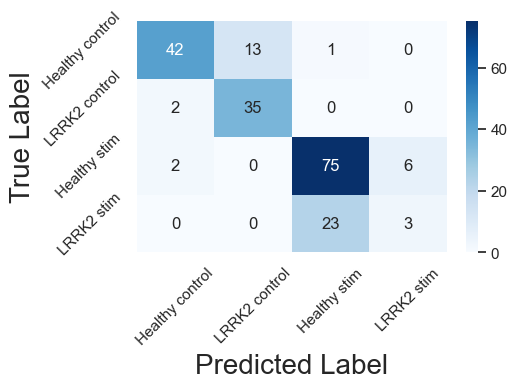

In [47]:
cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,3))
sns.set(font_scale=1.) 
chart = sns.heatmap(df_cm,annot=True,cmap='Blues')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted Label',fontdict={'size':20})
plt.ylabel('True Label',fontdict={'size':20})

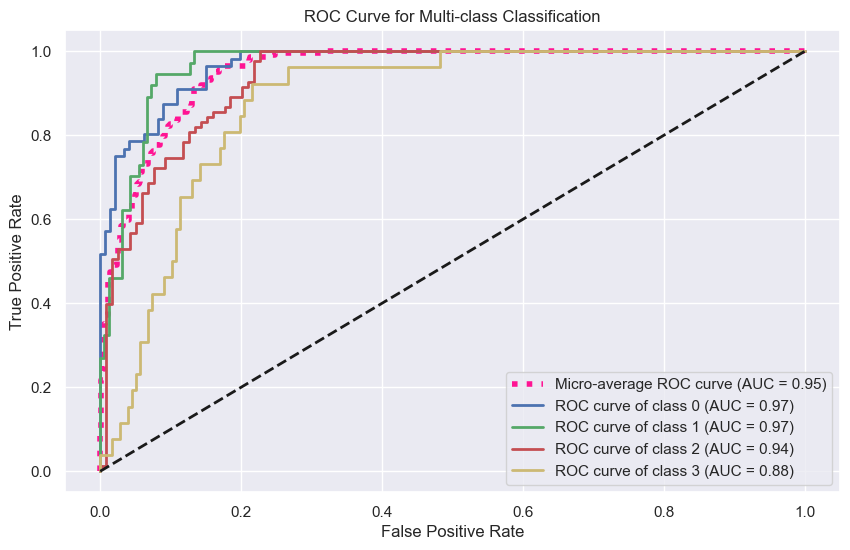

ROC AUC scores:
Class 0: 0.9689334637964775
Class 1: 0.9665847665847666
Class 2: 0.9364179406702441
Class 3: 0.8795891608391608
Micro-average ROC AUC: 0.952823252622292


0.952823252622292

In [49]:
plot_roc_curve_multiclass(y_true, y_prob, 1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

svm = SVC()

gs_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)

gs_svm.fit(X_train, y_train)

print("Best parameters found:", gs_svm.best_params_)

print("Best cross-validation accuracy:", gs_svm.best_score_)

test_accuracy = gs_svm.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

gs_svm4 = gs_svm.best_estimator_


In [57]:
print("Classification report on Test set\n")
y_true, y_pred = y_test,gs_svm4.predict(X_test)
y_prob = gs_svm4.predict_proba(X_test)
print(classification_report(y_true,y_pred))


Classification report on Test set

              precision    recall  f1-score   support

           0       0.91      0.54      0.67        56
           1       0.60      0.95      0.74        37
           2       0.74      0.99      0.85        83
           3       0.00      0.00      0.00        26

    accuracy                           0.73       202
   macro avg       0.56      0.62      0.56       202
weighted avg       0.67      0.73      0.67       202



/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
accuracy_svm = accuracy_score(y_true, y_pred)
precision_svm = precision_score(y_true, y_pred, average='macro') 
recall_svm = recall_score(y_true, y_pred, average='macro') 
f1_svm = f1_score(y_true, y_pred, average='macro')  
roc_auc_svm=plot_roc_curve_multiclass(y_true, y_prob, 0)
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print("Micro ROC AUC:", roc_auc_svm)

Accuracy: 0.7277227722772277
Precision: 0.5628194809229292
Recall: 0.6174030097222868
F1-Score: 0.5640900583440531
Micro ROC AUC: 0.9186517661667157


/Users/Gaia_1/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(29.749999999999993, 0.5, 'True')

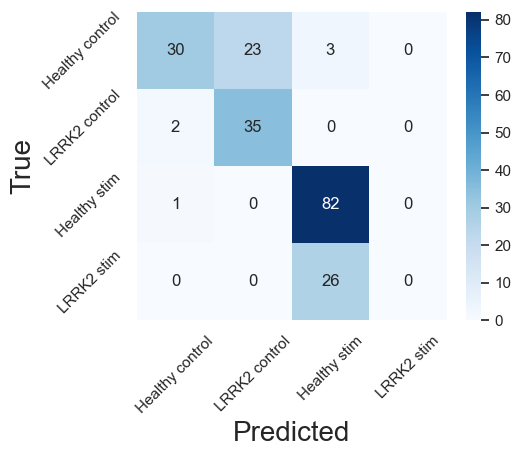

In [59]:
cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3])
df_cm = pd.DataFrame(cm,columns=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'],index=['Healthy control','LRRK2 control','Healthy stim','LRRK2 stim'])
plt.figure(figsize = (5,4))
sns.set(font_scale=1.) # for label size
chart = sns.heatmap(df_cm,annot=True,cmap='Blues')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
plt.xlabel('Predicted',fontdict={'size':20})
plt.ylabel('True',fontdict={'size':20})

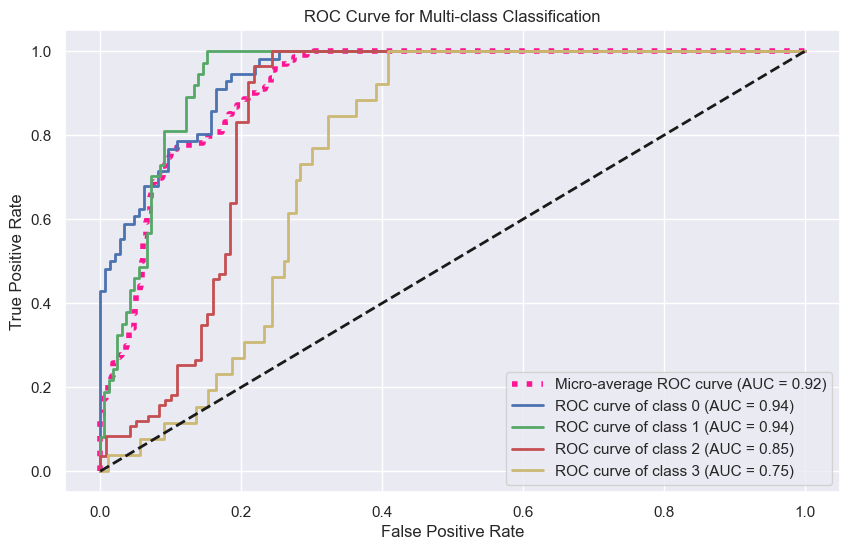

ROC AUC scores:
Class 0: 0.9430039138943249
Class 1: 0.9395577395577396
Class 2: 0.8471195707198542
Class 3: 0.7539335664335663
Micro-average ROC AUC: 0.9186517661667157


0.9186517661667157

In [61]:
plot_roc_curve_multiclass(y_true, y_prob, 1)

# Comparisons

In [110]:
print('\nDecision Tree: \n')
print('-->    Accuracy: ',accuracy_ct)
print('Recall: ',recall_ct)
print('-->    Precision: ',precision_ct)
print('F1 score: ',f1_ct)
print('ROC AUC: ',roc_auc_ct)
print('\nAverage Score:',(accuracy_ct + recall_ct + precision_ct + f1_ct + roc_auc_ct) / 5)

print('\n\nLogistic Regression: \n')
print('Accuracy: ',accuracy_lr)
print('Recall: ',recall_lr)
print('Precision: ',precision_lr)
print('F1 score: ',f1_lr)
print('ROC AUC: ',roc_auc_lr)
print('\nAverage Score:',(accuracy_lr + recall_lr + precision_lr + f1_lr + roc_auc_lr) / 5)

print('\n\nRandom Forest: \n')
print('-->      Accuracy: ',accuracy_rf)
print('-->        Recall: ',recall_rf)
print('Precision: ',precision_rf)
print('-->      F1 score: ',f1_rf)
print('ROC AUC: ',roc_auc_rf)
print('\n-->       Average Score:',(accuracy_rf + recall_rf + precision_rf + f1_rf + roc_auc_rf) / 5)

print('\n\nSupport Vector Machine: \n')
print('Accuracy: ',accuracy_svm)
print('-->        Recall: ',recall_svm)
print('-->     Precision: ',precision_svm)
print('-->      F1 score: ',f1_svm)
print('-->       ROC AUC: ',roc_auc_svm)
print('\nAverage Score:',(accuracy_svm + recall_svm + precision_svm + f1_svm + roc_auc_svm) / 5)



Decision Tree: 

-->    Accuracy:  0.7425742574257426
Recall:  0.6727722070342552
-->    Precision:  0.6843823326432021
F1 score:  0.6735639068359394
ROC AUC:  0.878684279319021

Average Score: 0.7303953966516321


Logistic Regression: 

Accuracy:  0.698019801980198
Recall:  0.5849180431258745
Precision:  0.7657456563706564
F1 score:  0.5534555861290679
ROC AUC:  0.9109155965101461

Average Score: 0.7026109368231885


Random Forest: 

-->      Accuracy:  0.7722772277227723
-->        Recall:  0.6978136036870977
Precision:  0.7109916326431248
-->      F1 score:  0.6911284738614546
ROC AUC:  0.9510219586315067

-->       Average Score: 0.7646465793091911


Support Vector Machine: 

Accuracy:  0.7277227722772277
-->        Recall:  0.6174030097222868
-->     Precision:  0.5628194809229292
-->      F1 score:  0.5640900583440531
-->       ROC AUC:  0.9186517661667157

Average Score: 0.6781374174866425


In [94]:
print('Accuracies: \n')
print('\n-->>   Classification Tree: ', round(accuracy_ct, 2))
print('\n\nLogistic Regression', round(accuracy_lr, 2))
print('\n\n-->>   Random Forest', round(accuracy_rf, 2))
print('\n\nSupport Vector Machine', round(accuracy_svm, 2))
print('\n\n\nRecalls: \n')
print('\n-->>   Classification Tree: ', round(recall_ct, 2))
print('\n\nLogistic Regression', round(recall_lr, 2))
print('\n\n-->>   Random Forest', round(recall_rf, 2))
print('\n\nSupport Vector Machine', round(recall_svm, 2))
print('\n\n\nPrecisions: \n')
print('\n-->>   Classification Tree: ', round(precision_ct, 2))
print('\n\n-->>   Logistic Regression', round(precision_lr, 2))
print('\n\nRandom Forest', round(precision_rf, 2))
print('\n\nSupport Vector Machine', round(precision_svm, 2))
print('\n\n\nF1 scores: \n')
print('\n-->>   Classification Tree: ', round(f1_ct, 2))
print('\n\nLogistic Regression', round(f1_lr, 2))
print('\n\n-->>   Random Forest', round(f1_rf, 2))
print('\n\nSupport Vector Machine', round(f1_svm, 2))
print('\n\n\nROC AUC: \n')
print('\nClassification Tree: ', round(roc_auc_ct, 2))
print('\n\nLogistic Regression', round(roc_auc_lr, 2))
print('\n\n-->>   Random Forest', round(roc_auc_rf, 2))
print('\n\-->>   Support Vector Machine', round(roc_auc_svm, 2))

print('\n\n\n Averages:')
print('\nCT:', round((accuracy_ct + recall_ct + precision_ct + f1_ct + roc_auc_ct) / 5, 2))
print('\nLR:', round((accuracy_lr + recall_lr + precision_lr + f1_lr + roc_auc_lr) / 5, 2))
print('\n-->>   RF:', round((accuracy_rf + recall_rf + precision_rf + f1_rf + roc_auc_rf) / 5, 2))
print('\nSVM:', round((accuracy_svm + recall_svm + precision_svm + f1_svm + roc_auc_svm) / 5, 2))


Accuracies: 


-->>   Classification Tree:  0.74


Logistic Regression 0.7


-->>   Random Forest 0.78


Support Vector Machine 0.73



Recalls: 


-->>   Classification Tree:  0.67


Logistic Regression 0.58


-->>   Random Forest 0.71


Support Vector Machine 0.62



Precisions: 


-->>   Classification Tree:  0.68


-->>   Logistic Regression 0.77


Random Forest 0.74


Support Vector Machine 0.56



F1 scores: 


-->>   Classification Tree:  0.67


Logistic Regression 0.55


-->>   Random Forest 0.71


Support Vector Machine 0.56



ROC AUC: 


Classification Tree:  0.88


Logistic Regression 0.91


-->>   Random Forest 0.95

\-->>   Support Vector Machine 0.92



 Averages:

CT: 0.73

LR: 0.7

-->>   RF: 0.78

SVM: 0.68


# Functions

In [38]:
def performance_visualizer(trials_obj,n_models,choice=False,**choice_var):
    
    import pandas as pd
    
    performance = [1-t['result']['loss'] for t in trials_obj.trials]
    
    
    hyperparam= list(trials_obj.trials[0]['misc']['vals'].keys())
    
    values_dict ={}
    
    for i in hyperparam:
        
        values_dict[i]=[]
        
        for j in trials_obj.trials:
            
            if(len(j['misc']['vals'][i])==0):
                
                values_dict[i].append(np.NaN)
                
            else:
            
                values_dict[i].append(j['misc']['vals'][i][0])
                
    out = pd.DataFrame.from_dict(values_dict)
    
    out['performance'] = performance
    
    out=out.sort_values(by=['performance'])
    
    
    if choice:
        
        for i in list(choice_var.keys()):
        
            for j,_ in enumerate(choice_var[i]):
        
                out[i]=out[i].replace(j,choice_var[i][j])
    
    return out.tail(n_models)

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve_multiclass(y_true, y_prob, visual):
    n_classes=4
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    if visual==1:
        # Plot ROC curve
        plt.figure(figsize=(10, 6))
        plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})', color='deeppink', linestyle=':', linewidth=4)

    colors = ['b', 'g', 'r', 'y']  # You can adjust the colors if you have more classes
    if visual==1:
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)


        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Multi-class Classification')
        plt.legend(loc="lower right")
        plt.show()

        # Print ROC AUC scores
        print("ROC AUC scores:")
        for i in range(n_classes):
            print(f"Class {i}: {roc_auc[i]}")
        print(f"Micro-average ROC AUC: {roc_auc['micro']}")
    auc_return=roc_auc['micro']
    return auc_return
# Example usage:
# plot_roc_curve_multiclass(y_true, y_pred_proba, 4)
